

# RNN for Time Series

RNNs are used for sequence modeling. This tutorial will look at a time series data to be modeled and predicted using RNNs. 

In [1]:
#
# Import Libraries
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
#

## Data

We will use retail data for time-series modeling. 

Link to the dataset:
 https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at:
https://www.census.gov/retail/marts/about_the_surveys.html

Release: Advance Monthly Sales for Retail and Food Services  
Units:  Millions of Dollars, Not Seasonally Adjusted
Frequency:  Monthly

Suggested Citation:
U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, November 16, 2019.

https://fred.stlouisfed.org/series/RSCCASN

### Read data first -  Use index_col = 'DATE' and 'parse_dates = True' as a parameter.

In [2]:
# Your code to read data
df = pd.read_csv('./MRTSSM448USN.csv', index_col = 'DATE', parse_dates=True)

# Print first few rows of data
df.head()

,MRTSSM448USN
DATE,
1992-01-01,6938.0
1992-02-01,7524.0
1992-03-01,8475.0
1992-04-01,9401.0
1992-05-01,9558.0


Does the sales column has any name?

If no, set the name of the colum as 'Sales'.

In [3]:
# Set name of column as 'Sales'. Use - df.columns 
df.columns

Index(['MRTSSM448USN'], dtype='object')

In [4]:
df.rename(columns={'MRTSSM448USN': 'Sales'}, inplace=True)
df.head()

,Sales
DATE,
1992-01-01,6938.0
1992-02-01,7524.0
1992-03-01,8475.0
1992-04-01,9401.0
1992-05-01,9558.0


Plot your data - Year vs Sales

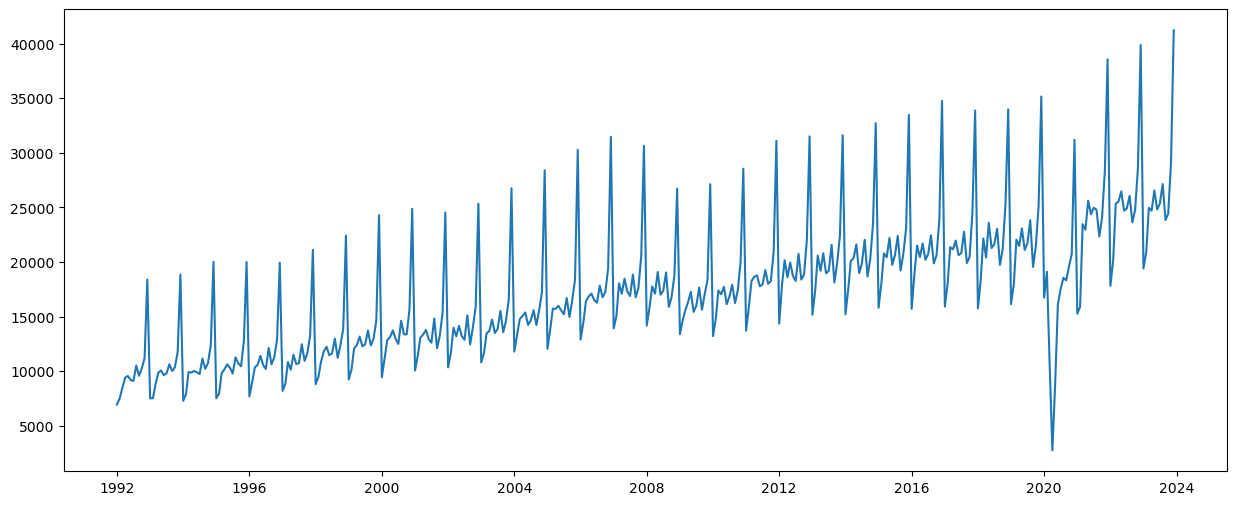

In [5]:
import matplotlib.pyplot as plt
# Your code to plot Year vs Sales. Use either matplot library of pandas dataframe.
plt.figure(figsize=(15, 6))
plt.plot(df)
plt.show()

### Next we will do Train Test Split. 

We will use last 1.5 year (18 month) samples for testing. Rest is for training.

In [40]:
# Assign variable test size = 18
# Store length of data in variable length.
# store training size in varialable train_size (Remember training size = total size - test_size)
test_size = 18

training_size = len(df)- test_size
test_size, training_size

(18, 366)

Now, we will find the indexes of the test data. Remember, these are the last 18 indexes in the pandas dataframe.

In [6]:
#Assign the start of test index in data frame to variable test_index.  Remember, it is equal to the length of dataframe - test size
test_index= 336

Next, we will separate train and test datasets.

In [7]:
# Store all data from 0 to test_index in variable train. Hint - Use df.iloc.
train = df.iloc[:336]
# Store everthing from test_index to the last sample in test variable. Hint - Use df.iloc.
test = df.iloc[336:]

In [8]:
# Print the size of the train data
print(train.shape)
# Print the size of the test data
print(test.shape)
# Print the train data
print(train.head())
# Print the test data
print(test.head())


(336, 1)
(48, 1)
             Sales
DATE              
1992-01-01  6938.0
1992-02-01  7524.0
1992-03-01  8475.0
1992-04-01  9401.0
1992-05-01  9558.0
              Sales
DATE               
2020-01-01  16738.0
2020-02-01  19106.0
2020-03-01  10926.0
2020-04-01   2752.0
2020-05-01   8644.0


### In Neural Networks, we need to Scale Data between 0-1

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [11]:
#
# Check if the data has been scaled properly
#
scaled_train

array([[0.        ],
       [0.02076394],
       [0.05446106],
       [0.08727234],
       [0.09283538],
       [0.07951244],
       [0.0767132 ],
       [0.12667423],
       [0.09336688],
       [0.11749699],
       [0.1505563 ],
       [0.40595989],
       [0.01998441],
       [0.02076394],
       [0.06477216],
       [0.10378428],
       [0.11072922],
       [0.09556374],
       [0.10119765],
       [0.13074906],
       [0.10895755],
       [0.12075686],
       [0.17085961],
       [0.4221175 ],
       [0.01211821],
       [0.03415775],
       [0.10569768],
       [0.10385515],
       [0.10881582],
       [0.10470555],
       [0.09910708],
       [0.1494933 ],
       [0.11618595],
       [0.13436326],
       [0.19190702],
       [0.46339735],
       [0.02055134],
       [0.03624832],
       [0.10194175],
       [0.11444972],
       [0.13046559],
       [0.11916236],
       [0.10084331],
       [0.15328467],
       [0.1336546 ],
       [0.12405216],
       [0.20597406],
       [0.462

In [12]:
scaled_test

array([[ 0.34724683],
       [ 0.431153  ],
       [ 0.1413082 ],
       [-0.148324  ],
       [ 0.06044929],
       [ 0.32602225],
       [ 0.37428247],
       [ 0.41155836],
       [ 0.40326695],
       [ 0.44720431],
       [ 0.48929913],
       [ 0.85940047],
       [ 0.29487634],
       [ 0.31790802],
       [ 0.58592587],
       [ 0.56792573],
       [ 0.66178868],
       [ 0.61746155],
       [ 0.63861526],
       [ 0.63252073],
       [ 0.54599249],
       [ 0.60676068],
       [ 0.75834455],
       [ 1.12061512],
       [ 0.38547941],
       [ 0.46821629],
       [ 0.65229254],
       [ 0.65909574],
       [ 0.69208419],
       [ 0.62940259],
       [ 0.63659556],
       [ 0.67716675],
       [ 0.59141804],
       [ 0.63244986],
       [ 0.76915173],
       [ 1.16735171],
       [ 0.44174757],
       [ 0.49603146],
       [ 0.63868613],
       [ 0.62936716],
       [ 0.69516689],
       [ 0.6332294 ],
       [ 0.6528949 ],
       [ 0.71593083],
       [ 0.59889448],
       [ 0

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

# We will use 12 months as input and then predict the next month out


In [13]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [14]:
X, y = generator[0]

print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.         0.02076394 0.05446106 0.08727234 0.09283538 0.07951244
 0.0767132  0.12667423 0.09336688 0.11749699 0.1505563  0.40595989]
Predict this y: 
 [[0.01998441]]


### Create the Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import GRU

import tensorflow as tf

In [16]:
# We're only using one feature in our time series
n_features = 1

# Define your own models. 

Use 1. SimpleRNN, LSTM, or GRU neural network.

APIs:
https://keras.io/api/layers/recurrent_layers/

In [17]:
# 
# Your code to create your own model
#
model = Sequential([
    LSTM(100, activation='relu', input_shape=(12,1)),
    #GRU(4),
    #keras.layers.Bidirectional(LSTM(10)),
    Dense(1)
])


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(optimizer='adam', loss='mse')

### EarlyStopping and creating a Validation Generator

NOTE: The scaled_test dataset size MUST be greater than your length chosen for your batches. Review video for more info on this.

In [20]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

# Your code to create an object early-stop.
early_stop = EarlyStopping(monitor="val_loss",patience=5)

Now, fit your model.

In [48]:
# Your code to fit your model.
history = model.fit(generator, epochs = 30,validation_data = validation_generator, callbacks = [early_stop])

Epoch 1/30
372/372 [==============================] - 1s 2ms/step - loss: 0.0028 - val_loss: 0.0198
Epoch 2/30
372/372 [==============================] - 1s 2ms/step - loss: 0.0028 - val_loss: 0.0082
Epoch 3/30
372/372 [==============================] - 1s 2ms/step - loss: 0.0027 - val_loss: 0.0127
Epoch 4/30
372/372 [==============================] - 1s 2ms/step - loss: 0.0033 - val_loss: 0.0113
Epoch 5/30
372/372 [==============================] - 1s 2ms/step - loss: 0.0023 - val_loss: 0.0123
Epoch 6/30
372/372 [==============================] - 1s 2ms/step - loss: 0.0027 - val_loss: 0.0083
Epoch 7/30
372/372 [==============================] - 1s 2ms/step - loss: 0.0027 - val_loss: 0.0055
Epoch 8/30
372/372 [==============================] - 1s 2ms/step - loss: 0.0026 - val_loss: 0.0088
Epoch 9/30
372/372 [==============================] - 1s 2ms/step - loss: 0.0024 - val_loss: 0.0054
Epoch 10/30
372/372 [==============================] - 1s 2ms/step - loss: 0.0021 - val_loss: 0.0079

<Axes: >

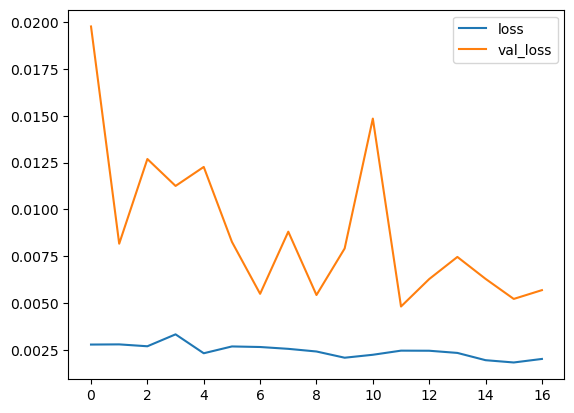

In [49]:
# Get Losses from dataframe (hint - model.history.history)- See previous week tutorial.
# Plot losses in the dataframe.
losses =  pd.DataFrame(model.history.history)
losses.plot()

## Evaluate on Test Data

In [50]:
first_eval_batch = scaled_train[-length:]

In [51]:
n_input = 12
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))
model.predict(first_eval_batch)


1/1 [==============================] - 0s 17ms/step


array([[0.3442815]], dtype=float32)

In [52]:
# compare with the true result:
scaled_test[0]

array([0.34724683])

#### Try predicting the series!

In [53]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for 
    # grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 9ms/step


## Inverse Transformations and Compare

In [54]:
true_predictions = scaler.inverse_transform(test_predictions)

In [55]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

C:\Users\mam357\AppData\Local\Temp\ipykernel_13536\1339453577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


# Check and plot predictions

In [56]:
# Print the test variable.
test

,Sales,Predictions
DATE,,
2020-01-01,16738.0,16654.312341
2020-02-01,19106.0,18387.418911
2020-03-01,10926.0,21074.392240
2020-04-01,2752.0,21260.713581
2020-05-01,8644.0,22365.179283
2020-06-01,16139.0,21439.127077
2020-07-01,17501.0,21637.622227
2020-08-01,18553.0,23343.731774
2020-09-01,18319.0,21441.315570


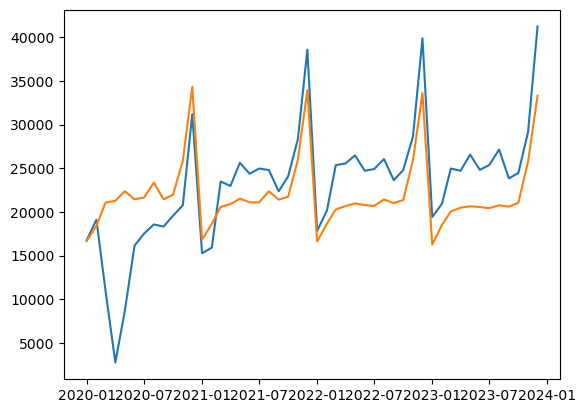

In [57]:
# Your code to plot actual sales and predictions.
plt.plot(test)

# Retrain and Forecasting

In [36]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [37]:
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, 
                                scaled_full_data, length=length, batch_size=1)

In [ ]:
#
# Use any neural network model based on RNN
#
# Create the model


In [ ]:
# compile the model

In [ ]:
# use early_stop

In [ ]:
# fit the model

In [ ]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for  grabbing just the number instead of [array])
    
    
    # store prediction forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value


In [ ]:
forecast = scaler.inverse_transform(forecast)

### Creating new timestamp index with pandas.

In [ ]:
df

In [ ]:
forecast_index = pd.date_range(start='2024-01-01',periods=periods,freq='MS')

In [ ]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [ ]:
forecast_df

In [ ]:
# Plot sales - Values in dataframe

In [ ]:
# Plot forecast - Values in forecast_df

### Joining pandas plots

https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

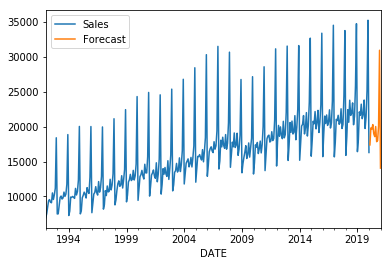

In [ ]:
ax = df.plot()
forecast_df.plot(ax=ax)

(576, 612)

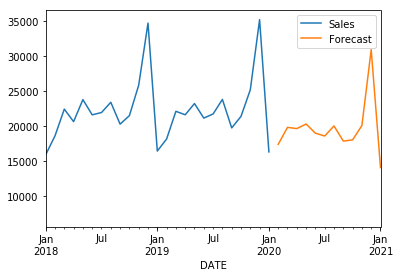

In [ ]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2022-01-01','2025-01-01')

# Try the same example with a LSTM and GRU! 
Hint: Use LSTM instead of SimpleRNN!